# Машинне навчання

## Метод опорних векторів (SVM)

###  Лабораторна робота 3


**_Студентка Пороскун Олена. Група ПМ.м-21_**

_________________________________________________________________________________________________________________________

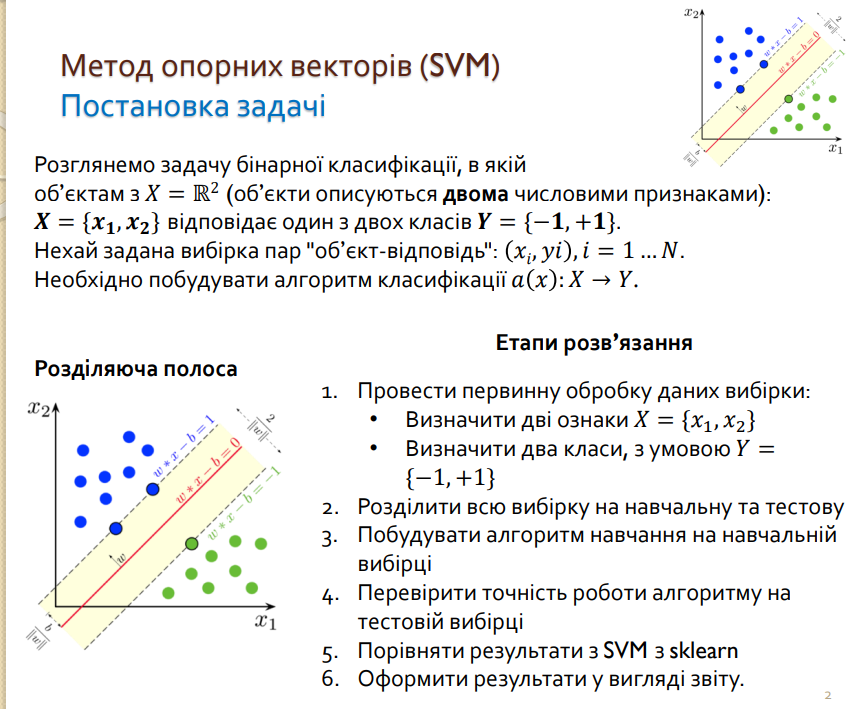

_________________________________________________________________________________________________________________________

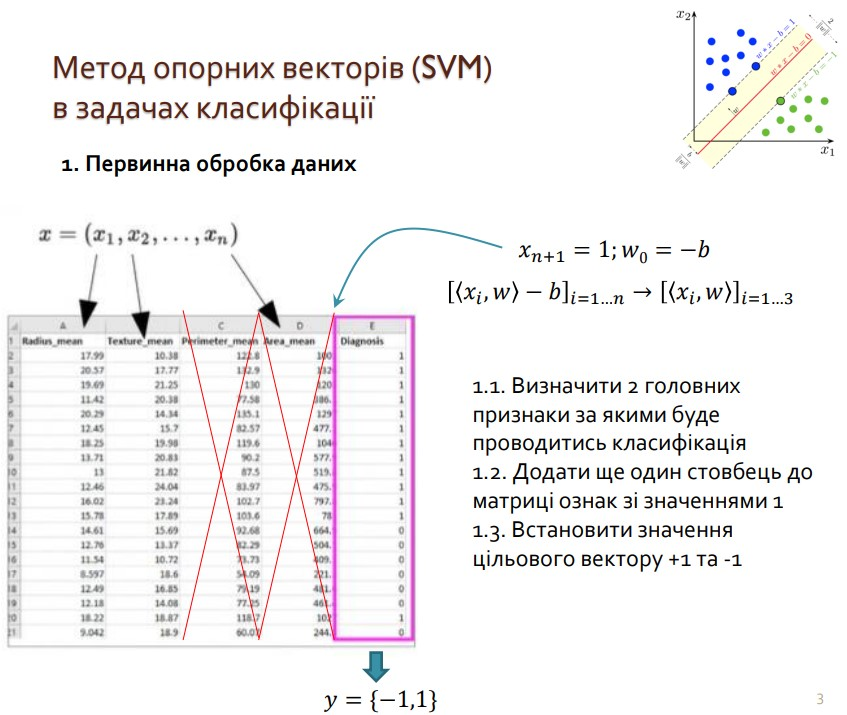

_________________________________________________________________________________________________________________________

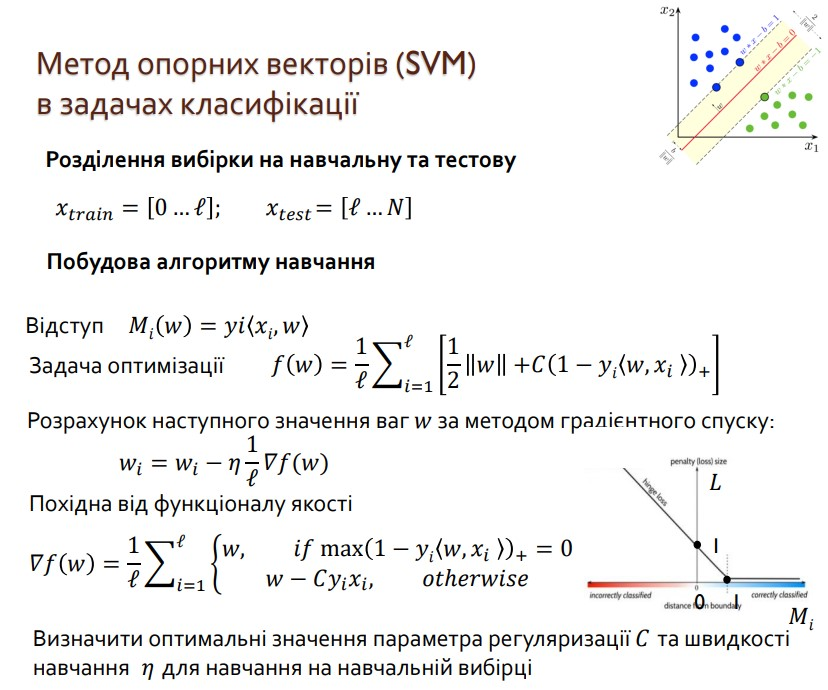

_________________________________________________________________________________________________________________________

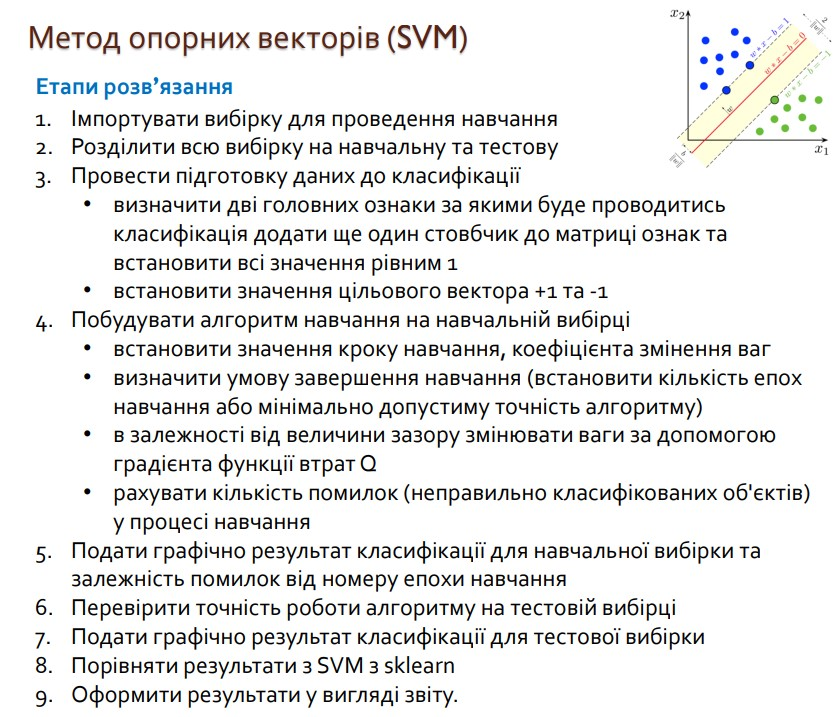

_________________________________________________________________________________________________________________________

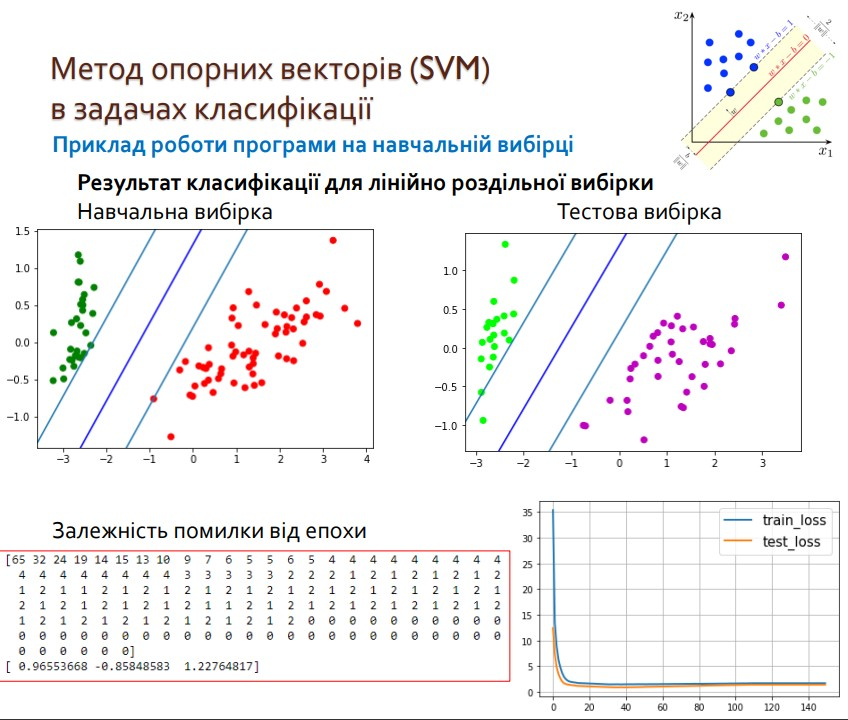

_________________________________________________________________________________________________________________________

* **Імпортуємо потрібні бібліотеки**:

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

* **Визначаємо функції, що реалізовують Метод опорних векторів (svm):**

In [2]:
 # функція для зображення лінії
def newline(p1, p2, color=None):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

In [3]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)  
    return a_extended

In [4]:
class CustomSVM(object):
    __class__ = "CustomSVM"
    __doc__ = """
    Це реалізація алгоритму класифікації SVM (тільки для бінарної класифікації)

    # Параметри
    etha: float(default - 0.01)
        Швидкість навчання, крок градієнта
        
    alpha: float, (default - 0.1)
        Параметр регуляризації в 0.5*alpha*||w||^2
        
    epochs: int, (default - 200)
        Кількість епох навчання
    """

    def __init__(self, etha=0.01, alpha=0.1, epochs=200):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.history_w = []
        self.train_errors = None
        self.val_errors = None
        self.train_loss = None
        self.val_loss = None

    def fit(self, X_train, Y_train, X_val, Y_val, verbose=False): #arrays: X; Y =-1,1

        if len(set(Y_train)) != 2 or len(set(Y_val)) != 2:
            raise ValueError("Кількість класів в Y не дорівнює 2!")

        X_train = add_bias_feature(X_train)
        X_val = add_bias_feature(X_val)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self._w)
        train_errors = []
        val_errors = []
        train_loss_epoch = []
        val_loss_epoch = []

        for epoch in range(self._epochs): 
            tr_err = 0
            val_err = 0
            tr_loss = 0
            val_loss = 0
            for i,x in enumerate(X_train):
                margin = Y_train[i]*np.dot(self._w,X_train[i])
                if margin >= 1: # классифицируем верно
                    self._w = self._w - self._etha*self._alpha*self._w/self._epochs
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self._w = self._w +\
                    self._etha*(Y_train[i]*X_train[i] - self._alpha*self._w/self._epochs)
                    tr_err += 1
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                self.history_w.append(self._w)
            for i,x in enumerate(X_val):
                val_loss += self.soft_margin_loss(X_val[i], Y_val[i])
                val_err += (Y_val[i]*np.dot(self._w,X_val[i])<1).astype(int)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'\
                      .format(epoch,err,loss))
            train_errors.append(tr_err)
            val_errors.append(val_err)
            train_loss_epoch.append(tr_loss)
            val_loss_epoch.append(val_loss)
        self.history_w = np.array(self.history_w)    
        self.train_errors = np.array(train_errors)
        self.val_errors = np.array(val_errors)
        self.train_loss = np.array(train_loss_epoch)
        self.val_loss = np.array(val_loss_epoch)                    

    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(np.dot(self._w,X_extended[i])))
        return np.array(y_pred)         

    def hinge_loss(self, x, y):
        return max(0,1 - y*np.dot(x, self._w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x,y)+self._alpha*np.dot(self._w, self._w)

* **Імпортуємо вибірку для проведення навчання**

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
print(np.shape(X))
print(np.shape(y))

(150, 4)
(150,)


In [7]:
dfIris = pd.DataFrame(data = np.c_[X, y], columns = iris['feature_names'] + ['target'])
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
print(dfIris['target'].unique())

[0. 1. 2.]


* **Проводимо підготовку даних до класифікації:**

In [9]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

y = (y > 0).astype(int)*2-1 # [0,1,2] --> [False,True,True] --> [0,1,1] --> [0,2,2] --> [-1,1,1]

In [10]:
dfIris2 = pd.DataFrame(data = np.c_[X, y], columns = ['x1', 'x2'] + ['y'])
dfIris2

,x1,x2,y
0,-2.684126,0.319397,-1.0
1,-2.714142,-0.177001,-1.0
2,-2.888991,-0.144949,-1.0
3,-2.745343,-0.318299,-1.0
4,-2.728717,0.326755,-1.0
...,...,...,...
145,1.944110,0.187532,1.0
146,1.527167,-0.375317,1.0
147,1.764346,0.078859,1.0
148,1.900942,0.116628,1.0


Text(0.5, 1.0, 'Дані з 2-ма класами')

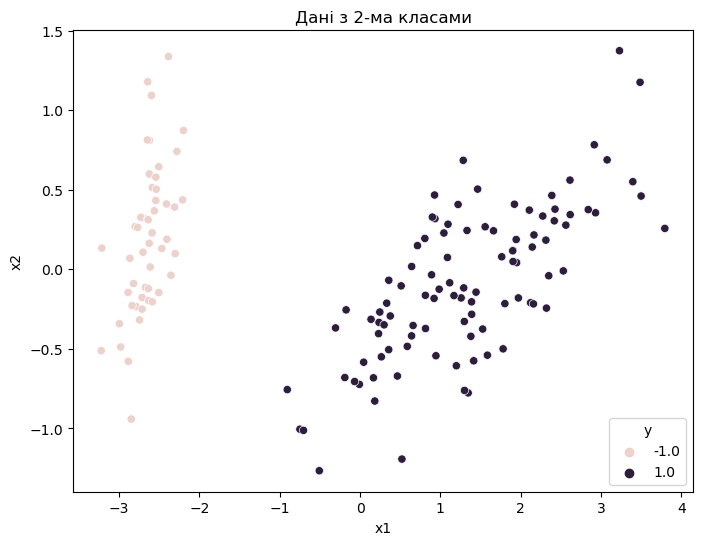

In [11]:
sns.scatterplot(x = dfIris2['x1'], y = dfIris2['x2'], hue = dfIris2['y'])
plt.title('Дані з 2-ма класами')
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")

* **Розділяємо всю вибірку на навчальну та тестову. Навчаємо алгоритм на навчальній вибірці.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [13]:
# блок ініціалізації та навчання
svm = CustomSVM(etha=0.005, alpha=0.006, epochs=150)
svm.fit(X_train, y_train, X_test, y_test)

* **Подаємо графічно результат класифікації для навчальної вибірки та залежність помилок від номеру епохи навчання.**

In [14]:
df_train = pd.DataFrame(data = np.c_[X_train, y_train], columns = ['x1', 'x2'] + ['y'])
display(df_train.head(5))

,x1,x2,y
0,1.764346,0.078859,1.0
1,-2.310256,0.391346,-1.0
2,-0.173925,-0.254854,1.0
3,1.971531,-0.179728,1.0
4,0.136429,-0.314032,1.0


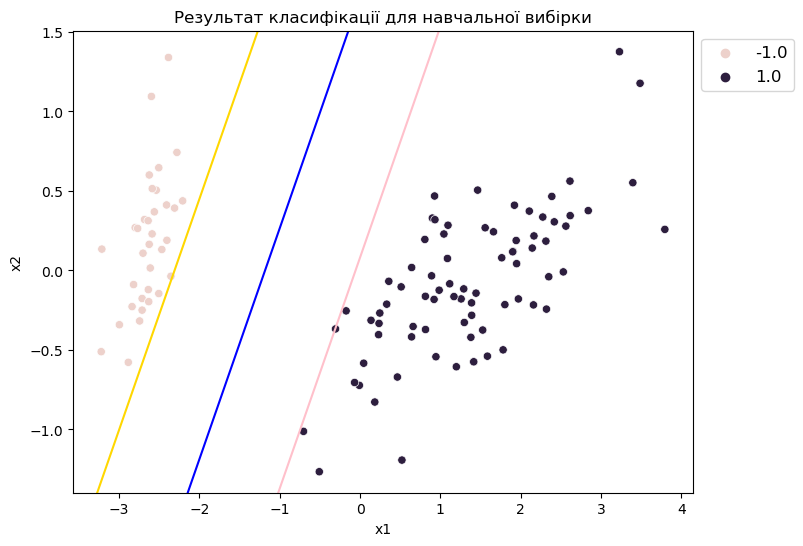

In [15]:
sns.scatterplot(x = df_train['x1'], y = df_train['x2'], hue = df_train['y'])

# в w0*x_i[0]+w1*x_i[1]+w2*1=0 по черзі
# підставляємо x_i[0]=0, x_i[1]=0
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue') 
                                                                   
# w0*x_i[0] + w1*x_i[1] + w2*1 = 1
newline([0,  1 / svm._w[1]-svm._w[2]/svm._w[1]], [ 1 / svm._w[0]-svm._w[2]/svm._w[0], 0], 'pink')

# w0*x_i[0] + w1*x_i[1] + w2*1 = -1
newline([0, -1 / svm._w[1]-svm._w[2]/svm._w[1]], [-1 / svm._w[0]-svm._w[2]/svm._w[0], 0], 'gold') 

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Результат класифікації для навчальної вибірки" )
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show()

Кількість помилок у кожну епоху:
 [84 36 26 18 15 14 13  8  8  5  5  5  6  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  3  3  3  1  2  1  1  2  1  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0
  0  0  0  0  0  0] 

Значення ваг або коефіцієнтів для прямої w0*x_i[0]+w1*x_i[1]+w2=0 :
 [ 0.88713539 -0.61137468  1.0493689 ]


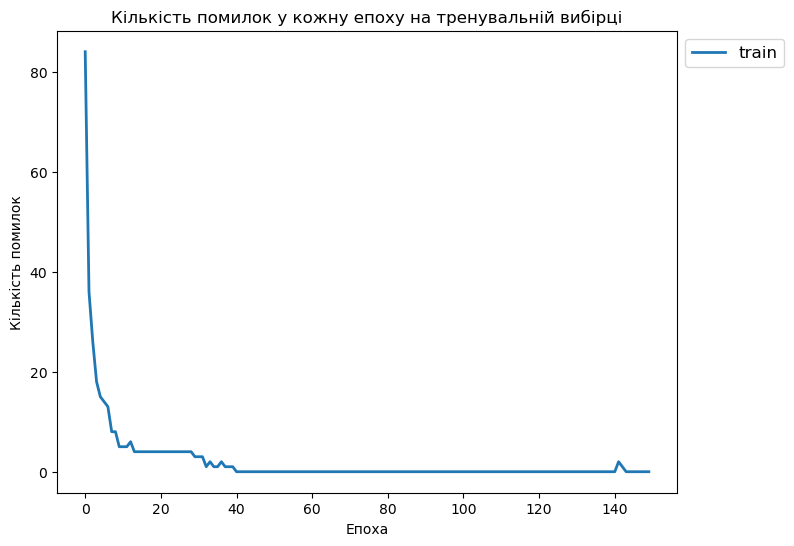

In [16]:
print('Кількість помилок у кожну епоху:\n', svm.train_errors, '\n')
print('Значення ваг або коефіцієнтів для прямої w0*x_i[0]+w1*x_i[1]+w2=0 :\n', svm._w)

plt.plot(svm.train_errors, linewidth=2, label='train')
plt.xlabel("Епоха")
plt.ylabel("Кількість помилок")
plt.title("Кількість помилок у кожну епоху на тренувальній вибірці" )
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show()

* **Перевіряємо точність роботи алгоритму на тестовій вибірці:**

In [17]:
# Прогнозуємо значення на тестовій вибірці
y_predict = svm.predict(X_test)

In [18]:
# Вимірюємо точність прогнозів
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
#print("Accuracy score: %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy: 1.0


* **Подаємо графічно результат класифікації для тестової вибірки**

In [19]:
df_test = pd.DataFrame(data = np.c_[X_test, y_test], columns = ['x1', 'x2'] + ['y'])
display(df_test.head(5))

,x1,x2,y
0,2.123609,-0.209729,1.0
1,0.714853,0.149056,1.0
2,0.299001,-0.348898,1.0
3,2.932587,0.355500,1.0
4,1.332024,0.244441,1.0


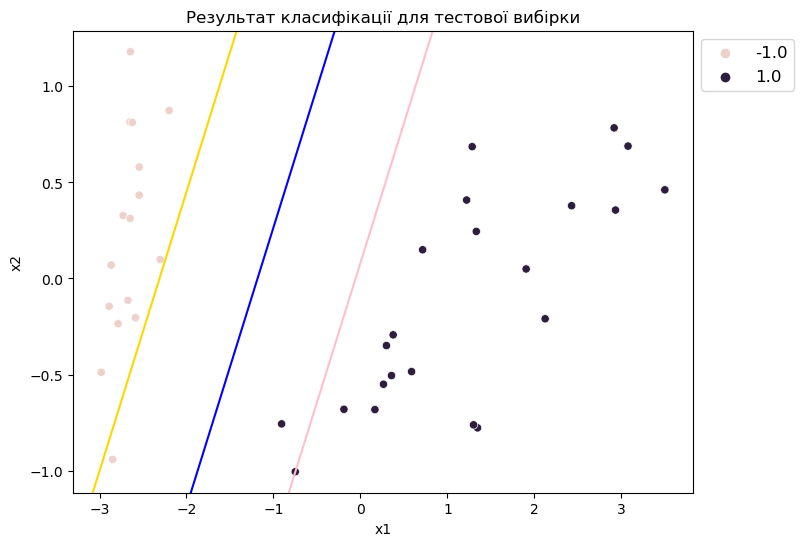

In [20]:
sns.scatterplot(x = df_test['x1'], y = df_test['x2'], hue = df_test['y'])
#d = {-1:'yellow', 1:'blue'}
#plt.scatter(X_test[:,0], X_test[:,1], c=[d[y] for y in y_test], label = d)

# в w0*x_i[0] + w1*x_i[1] + w2*1 = 0 по черзі
# підставляємо x_i[0] = 0, x_i[1] = 0
newline([0, -svm._w[2] / svm._w[1]], [-svm._w[2]/svm._w[0], 0], 'blue') 
                                                                   
# w0*x_i[0] + w1*x_i[1] + w2*1 = 1
newline([0,  1 / svm._w[1]-svm._w[2]/svm._w[1]], [ 1 / svm._w[0]-svm._w[2]/svm._w[0], 0], 'pink')

# w0*x_i[0] + w1*x_i[1] + w2*1 = -1
newline([0, -1 / svm._w[1]-svm._w[2]/svm._w[1]], [-1 / svm._w[0]-svm._w[2]/svm._w[0], 0], 'gold') 

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Результат класифікації для тестової вибірки" )
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show()

* Побудуємо функції втрат навчальної та тестовоої вибірки.

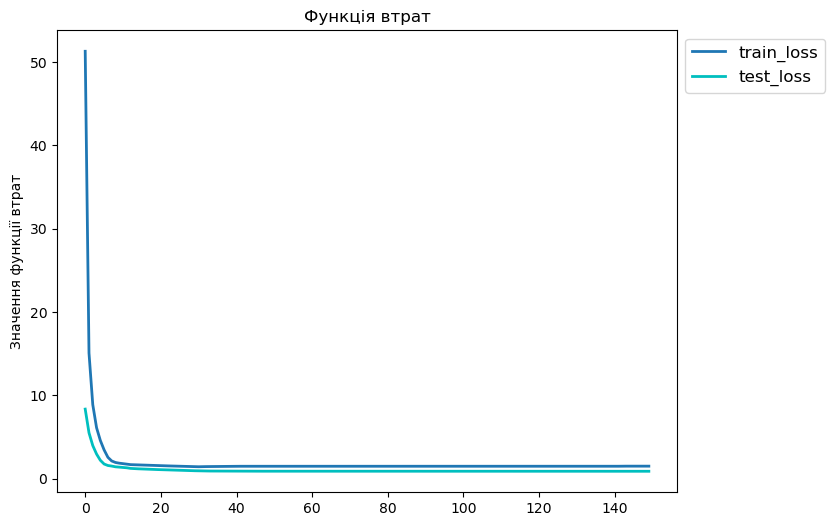

In [21]:
plt.plot(svm.train_loss, linewidth=2, label='train_loss')
plt.plot(svm.val_loss, linewidth=2, label='test_loss', c = 'c')
plt.ylabel("Значення функції втрат")
plt.title("Функція втрат" )
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show()

___________________________________________________________________________________________________________________________

* **Порівняємо результати з SVM з sklearn.**

In [22]:
#Import svm model
from sklearn import svm

# Створюємо svm Класифікатор
clf = svm.SVC(kernel='linear') # Linear Kernel

# Навчаємо модель за допомогою навчальних наборів
clf.fit(X_train, y_train)

# Прогнозуємо значення цільової змінної для тестового набору даних
y_pred = clf.predict(X_test)

In [23]:
# Вимірюємо точність прогнозів
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy score: %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy: 1.0


Отже, результати співпадають.

_____________________________________________________________________________________________________________________